In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\conta\OneDrive\Desktop\powerbi\Telco Customer Churn\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [43]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,0.0
mean,0.162400,32.421786,64.798208,2283.300441,NaN
std,0.368844,24.545260,30.085974,2266.771362,NaN
min,0.000000,1.000000,18.250000,18.800000,NaN
25%,0.000000,9.000000,35.587500,401.450000,NaN
50%,0.000000,29.000000,70.350000,1397.475000,NaN
75%,0.000000,55.000000,89.862500,3794.737500,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN


In [44]:
df['Churn'].isnull().sum()

np.int64(7032)

In [ ]:
df['Churn'] = df['Churn'].fillna(False)


In [ ]:
df['your_column'].isna().sum()


In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<Axes: xlabel='Churn', ylabel='count'>

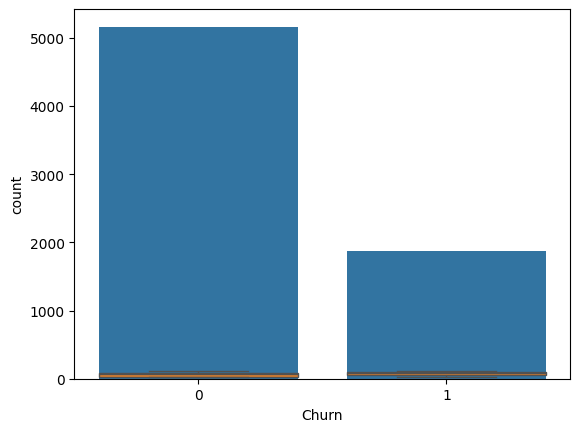

In [11]:

sns.countplot(data=df, x='Churn')
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')

<Axes: >

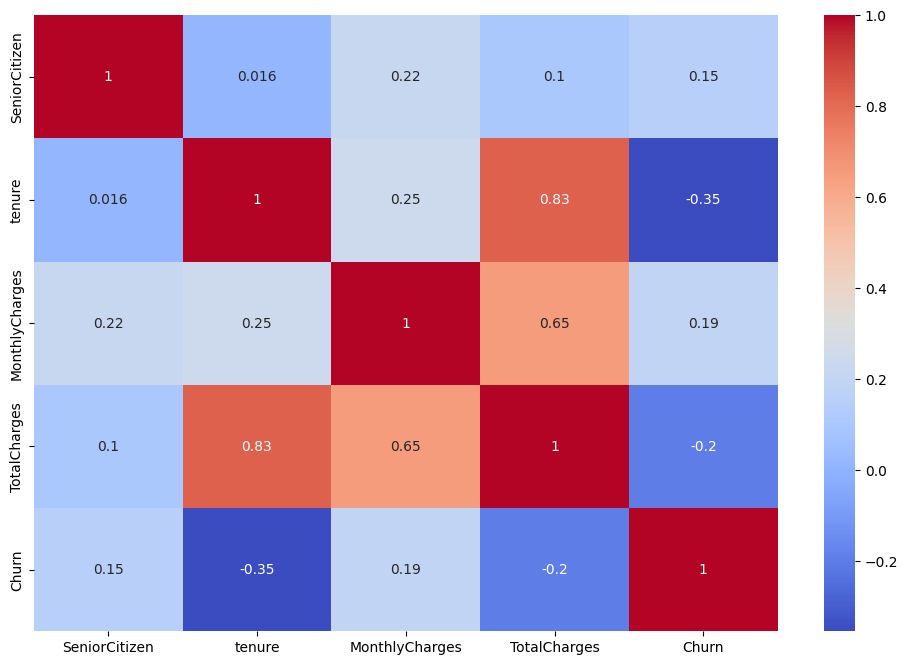

In [17]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')


In [32]:
df.to_csv(r'C:\Users\conta\OneDrive\Desktop\powerbi\Telco Customer Churn\archive\processed data\proccesed_data.csv', index=False)

In [35]:
# def load_and_clean_data(filepath):
#     df = pd.read_csv(filepath)
#     df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
#     df.dropna(inplace=True)
#     df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
#     df = pd.get_dummies(df, drop_first=True)
#     return df

In [36]:
# def save_processed_data(df, output_path):
#     df.to_csv(output_path, index=False)

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
df = pd.read_csv(r'C:\Users\conta\OneDrive\Desktop\powerbi\Telco Customer Churn\archive\processed data\proccesed_data.csv')
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# df.isnull().sum()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,0.0
mean,0.162400,32.421786,64.798208,2283.300441,NaN
std,0.368844,24.545260,30.085974,2266.771362,NaN
min,0.000000,1.000000,18.250000,18.800000,NaN
25%,0.000000,9.000000,35.587500,401.450000,NaN
50%,0.000000,29.000000,70.350000,1397.475000,NaN
75%,0.000000,55.000000,89.862500,3794.737500,NaN
max,1.000000,72.000000,118.750000,8684.800000,NaN


In [40]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: Input y contains NaN.